<a href="https://colab.research.google.com/github/Dau2004/Group_3_Water_Portability_formative/blob/main/Leslie_Water_Quality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')


In [58]:
# Loading the dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1H_kRGjtavba31uVjs-HILSNirokfz1R0MZa64ov4NR8/export?format=csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [59]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [60]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [61]:
# save this clean data with out any missing values
df.to_csv('cleaned_water_potability.csv', index=False)


In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.shape

(3276, 10)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [65]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.074194,1.470040,0.000000,6.277673,7.036752,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.608364,36.143851,129.000000,317.094638,333.073546,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.407478,15.769958,0.738000,56.647656,66.622485,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# Separate features and target


In [66]:
# Use full feature set (9 features)
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape)  # You should see (2293, 9)
# Confirm shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 9)
(2293, 9)
(492, 9)
(2293,)
(492,)


# Step 2: Model Architecture & Training Configurations

In [69]:
def model_Leslie():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            64,
            activation='relu',
            kernel_regularizer=l2(0.001),
            input_shape=(9,)
        ),                          # 9 input features
        tf.keras.layers.Dropout(0.20),
        tf.keras.layers.Dense(
            32,
            activation='relu',
            kernel_regularizer=l2(0.001)
        ),
        tf.keras.layers.Dropout(0.20),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Member1’s tuned LR
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    return model

# Step 4: Model Training & Evaluation


Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 9.
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Final Results:
Train  - Accuracy: 0.706, Precision: 0.650, Recall: 0.535
Test   - Accuracy: 0.665, Precision: 0.589, Recall: 0.464, F1 Score: 0.519


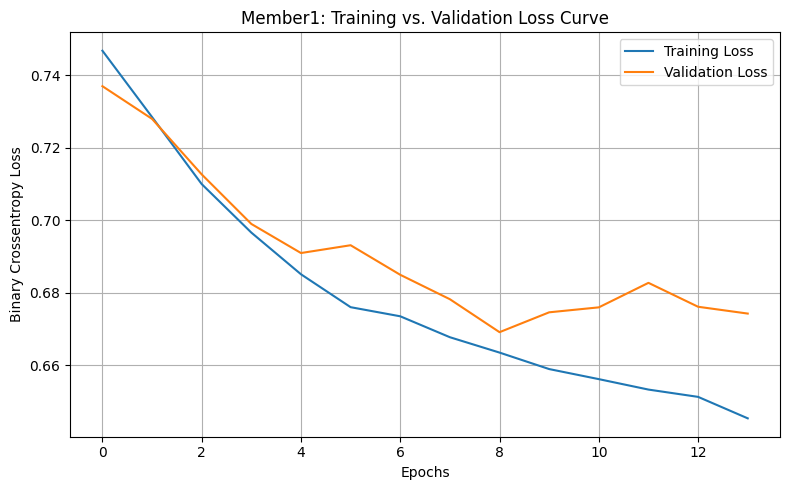

In [70]:
# 1. Build  model (with AdamW)
model = model_Leslie()
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

# 2. EarlyStopping: stop if val_loss doesn’t improve for 5 epochs (Member1’s choice)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Compute class weights based on training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# 3. Train the model with validation monitoring
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=4000,
    verbose=0,            # use verbose=1 if you want to watch each epoch’s output
    callbacks=[early_stop],
    class_weight=class_weights
)

# 4. Evaluate performance on both training and testing sets
train_loss, train_acc, train_precision, train_recall = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc, test_precision, test_recall   = model.evaluate(X_test, y_test, verbose=0)

# 4.1 Compute F1 Score
y_pred_prob = model.predict(X_test).ravel()
y_pred_binary = (y_pred_prob > 0.5).astype(int)
f1 = f1_score(y_test, y_pred_binary)


print(f"Final Results:")
print(f"Train  - Accuracy: {train_acc:.3f}, Precision: {train_precision:.3f}, Recall: {train_recall:.3f}")
print(f"Test   - Accuracy: {test_acc:.3f}, Precision: {test_precision:.3f}, Recall: {test_recall:.3f}, F1 Score: {f1:.3f}")

# 5. Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Member1: Training vs. Validation Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
